In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import statistics as stats

In [6]:
url=("D:\data sciencce\practical 8 lab\Social_Network_Ads.csv")
df=pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (320, 2), Y: (320,)
Test Dataset Size - X: (80, 2), Y: (80,)


Text(0.5, 1.0, 'Regression Line Tracing')

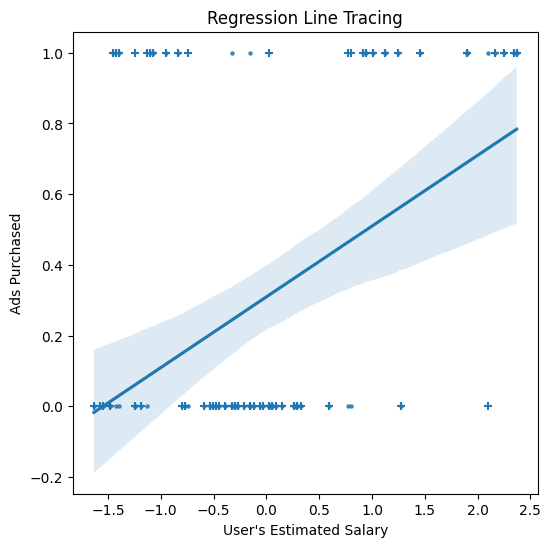

In [11]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 0, solver='lbfgs' )
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test[:, 1], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test[:, 1], Y_test, marker = '+')
plt.xlabel("User's Estimated Salary")
plt.ylabel('Ads Purchased')
plt.title('Regression Line Tracing')


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
| Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n''')
cr = classification_report(Y_test, predictions)
print('Classification report : \n', cr)


Confusion matrix :

| Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 48	| False Negative (FN) 3
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 8	| True Negative (TN) 21

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        51
           1       0.88      0.72      0.79        29

    accuracy                           0.86        80
   macro avg       0.87      0.83      0.84        80
weighted avg       0.86      0.86      0.86        80



Accuracy of model

In [17]:
accuracy = lm.score(X_test, Y_test)
print("Accuracy rate:", accuracy)


Accuracy rate: 0.8625
